# Small homework 1
Written by Balázs Fényes (Neptun code: CAU3ZN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Task 5:
> Python (vagy LUA) nyelven olvass be öt darab tetszőleges 32x32 pixeles színes képet, jelenítsd meg és írd ki az RGB csatornáit tartalmazó tömbök (mátrixok, tensorok) tartalmát.

I will read 5 images of size 32x32 pixels and display the images and output their RGB values. I use matplotlib for displaying the images.

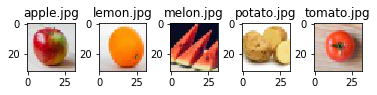

In [2]:
image_names=["apple.jpg","lemon.jpg","melon.jpg","potato.jpg","tomato.jpg"]
ia = np.ndarray((5,32,32,3))
fig, ax = plt.subplots(ncols=5, nrows=1)
plt.subplots_adjust(wspace=.5)
for i in range(5):
    ax[i].set_title(image_names[i])
    img = plt.imread(image_names[i])
    ax[i].imshow(img)
    ia[i] = img    

The RGB values of the pixels:

In [3]:
for i in range(5):
    print("Contents of %s:" % image_names[i])
    print(ia[i])

Contents of apple.jpg:
[[[223. 211. 211.]
  [219. 220. 222.]
  [211. 219. 222.]
  ...
  [229. 214. 219.]
  [229. 214. 221.]
  [223. 210. 219.]]

 [[216. 218. 217.]
  [209. 209. 211.]
  [215. 213. 218.]
  ...
  [222. 218. 217.]
  [220. 216. 217.]
  [218. 216. 217.]]

 [[205. 219. 219.]
  [218. 222. 225.]
  [225. 216. 221.]
  ...
  [215. 224. 219.]
  [210. 219. 214.]
  [218. 228. 220.]]

 ...

 [[222. 219. 228.]
  [220. 221. 225.]
  [219. 228. 223.]
  ...
  [159. 137. 123.]
  [163. 147. 134.]
  [170. 156. 145.]]

 [[223. 226. 235.]
  [216. 217. 222.]
  [219. 221. 218.]
  ...
  [193. 177. 162.]
  [194. 180. 171.]
  [195. 182. 176.]]

 [[215. 219. 230.]
  [219. 222. 227.]
  [224. 224. 222.]
  ...
  [210. 193. 183.]
  [210. 195. 188.]
  [206. 190. 190.]]]
Contents of lemon.jpg:
[[[233. 251. 251.]
  [239. 250. 246.]
  [243. 248. 244.]
  ...
  [248. 247. 243.]
  [250. 244. 246.]
  [255. 243. 255.]]

 [[242. 248. 246.]
  [246. 247. 242.]
  [247. 246. 242.]
  ...
  [249. 247. 250.]
  [249. 249.

Task 6:
> Csatornánként számold ki az egyes pixelek átlagát és szórását az öt képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. (Pythonban: sklearn.preprocessing.StandardScaler, „kézi” megoldás még jobb!)

I calculate the average values of the R, G, B channels for every image and then I calculate the standard deviation. I then calculate the standardized values per pixel and print the results.

In [4]:
ia_norm = np.ndarray((5,32,32,3))
for image in range(5):
    print("%s" % image_names[image])
    for channel in range(3):
        print("\t%c channel:" % "RGB"[channel])
        arr = list(ia[image].flat[channel::3]);
        mean = sum(arr)/32/32;
        print("\t\tmean: %f" % mean)
        sd = (sum(map(lambda x: (x-mean)**2,arr))/32/32)**.5
        print("\t\tSD: %f" % sd)
        for x in range(32):
            for y in range(32):
                ia_norm[image,x,y,channel]=(ia[image,x,y,channel]-mean)/sd

apple.jpg
	R channel:
		mean: 184.824219
		SD: 40.137755
	G channel:
		mean: 141.184570
		SD: 76.121511
	B channel:
		mean: 127.618164
		SD: 85.891077
lemon.jpg
	R channel:
		mean: 237.304688
		SD: 20.480005
	G channel:
		mean: 177.470703
		SD: 54.452093
	B channel:
		mean: 117.831055
		SD: 106.790691
melon.jpg
	R channel:
		mean: 139.030273
		SD: 95.461728
	G channel:
		mean: 71.428711
		SD: 67.411971
	B channel:
		mean: 65.368164
		SD: 47.241031
potato.jpg
	R channel:
		mean: 217.974609
		SD: 37.779135
	G channel:
		mean: 190.646484
		SD: 51.982682
	B channel:
		mean: 139.699219
		SD: 77.267844
tomato.jpg
	R channel:
		mean: 200.159180
		SD: 38.296809
	G channel:
		mean: 140.047852
		SD: 54.538195
	B channel:
		mean: 122.186523
		SD: 61.376268


The standardized pixel values for every image:

In [5]:
ia_norm

array([[[[ 0.95111899,  0.91715769,  0.97078578],
         [ 0.85146219,  1.03538971,  1.09885496],
         [ 0.65214861,  1.02225282,  1.09885496],
         ...,
         [ 1.10060418,  0.95656837,  1.063927  ],
         [ 1.10060418,  0.95656837,  1.08721231],
         [ 0.95111899,  0.9040208 ,  1.063927  ]],

        [[ 0.7767196 ,  1.00911593,  1.0406417 ],
         [ 0.60232021,  0.89088391,  0.97078578],
         [ 0.7518054 ,  0.94343147,  1.05228435],
         ...,
         [ 0.92620479,  1.00911593,  1.0406417 ],
         [ 0.87637639,  0.98284215,  1.0406417 ],
         [ 0.82654799,  0.98284215,  1.0406417 ]],

        [[ 0.50266342,  1.02225282,  1.063927  ],
         [ 0.82654799,  1.06166349,  1.13378292],
         [ 1.00094738,  0.98284215,  1.08721231],
         ...,
         [ 0.7518054 ,  1.08793728,  1.063927  ],
         [ 0.62723441,  1.02225282,  1.00571374],
         [ 0.82654799,  1.14048484,  1.07556966]],

        ...,

        [[ 0.92620479,  1.02225282,  1

Task 7:
> Python (vagy LUA) nyelven olvass be egy tetszőleges hangfájlt és jelenítsd meg a spektrogramját (Pythonban: Matplotlib/specgram()).

I use scipy to read a wav audio file, and matplotlib to display its spectrum.

In [6]:
from scipy.io.wavfile import read

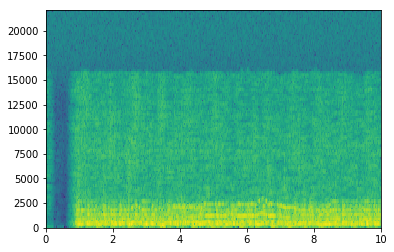

In [7]:
audio = read("music.wav")
_ = plt.specgram(audio[1], Fs=audio[0])

Task 8:
> Python (vagy LUA) nyelven tölts le a http://www.snopes.com/facebook-ai-developed-own-language/ oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát.

I use the urllib library to download the given website. I use the BeautifulSoup library to extract the visible text from the website.

In [ ]:
from bs4 import BeautifulSoup
import urllib

url = "http://www.snopes.com/facebook-ai-developed-own-language/"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, "lxml")

# remove javascript and css
for script in soup(["script", "style"]):
    script.decompose()

lines = soup.get_text().split("\n");
text = "\n".join(filter(lambda s: s.strip() != "", lines))

print(text)

I use numpy's _unique()_ function the count the number of each a-z and A-Z character. Then I sort this list and use matplotlib to create the histogram.

<BarContainer object of 26 artists>

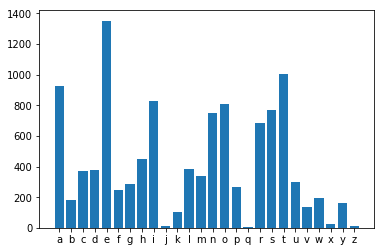

In [9]:
# filter for a-z and A-Z characters
chars, counts = np.unique(list(map(lambda c: chr(c+ord('a')), filter(lambda c: c >= 0 and c <= ord('z')-ord('a'), map(lambda c: ord(str.lower(c))-ord('a'), list(text))))), return_counts=True)
plt.bar(chars, counts)